In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random


In [38]:
data_path1 = pd.read_csv('/content/drive/MyDrive/Behaviour cloning/term1_path1/driving_log_path1.csv')
# print(data_path1.head)

datadir = '/content/drive/MyDrive/Behaviour cloning/term1_path1'
columns = ['center','left','right','steering','throttle','reverse','speed' ]
data = pd.read_csv(os.path.join(datadir,'/content/drive/MyDrive/Behaviour cloning/term1_path1/driving_log_path1.csv'),names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

center  \
0  C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\center_2024_09_27_17_04_29_869.jpg   
1  C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\center_2024_09_27_17_04_29_973.jpg   
2  C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\center_2024_09_27_17_04_30_077.jpg   
3  C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\center_2024_09_27_17_04_30_185.jpg   
4  C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\center_2024_09_27_17_04_30_290.jpg   

                                                                                                       left  \
0   C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\left_2024_09_27_17_04_29_869.jpg   
1   C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\left_2024_09_27_17_04_29_973.jpg   
2   C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\left_2024_09_27_17_04_30_077.jpg   
3   C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\left_2024_09_27_17_04_30_185.jpg   
4   C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\left_2024_09_27_17_04_30_290.jpg   

                                                                                                       right  \
0   C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\right_2024_09_27_17_04_29_869.jpg   
1   C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\right_2024_09_27_17_04_29_973.jpg   
2   C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\right_2024_09_27_17_04_30_077.jpg   
3   C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\right_2024_09_27_17_04_30_185.jpg   
4   C:\Users\Ogale\Desktop\Simulation\simulator-windows-64\term1_path1\IMG\right_2024_09_27_17_04_30_290.jpg   

   steering  throttle  reverse     speed  
0       0.0       0.0      0.0  0.000079  
1       0.0       0.0      0.0  0.000081  
2       0.0       0.0      0.0  0.000080  
3       0.0       0.0      0.0  0.000080  
4       0.0       0.0      0.0  0.000079

In [39]:
print('total data:', len(data))
print(data.shape)


total data: 5657
(5657, 7)


In [40]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2024_09_27_17_04_29_869.jpg  left_2024_09_27_17_04_29_869.jpg   
1  center_2024_09_27_17_04_29_973.jpg  left_2024_09_27_17_04_29_973.jpg   
2  center_2024_09_27_17_04_30_077.jpg  left_2024_09_27_17_04_30_077.jpg   
3  center_2024_09_27_17_04_30_185.jpg  left_2024_09_27_17_04_30_185.jpg   
4  center_2024_09_27_17_04_30_290.jpg  left_2024_09_27_17_04_30_290.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2024_09_27_17_04_29_869.jpg       0.0       0.0      0.0  0.000079  
1  right_2024_09_27_17_04_29_973.jpg       0.0       0.0      0.0  0.000081  
2  right_2024_09_27_17_04_30_077.jpg       0.0       0.0      0.0  0.000080  
3  right_2024_09_27_17_04_30_185.jpg       0.0       0.0      0.0  0.000080  
4  right_2024_09_27_17_04_30_290.jpg       0.0       0.0      0.0  0.000079

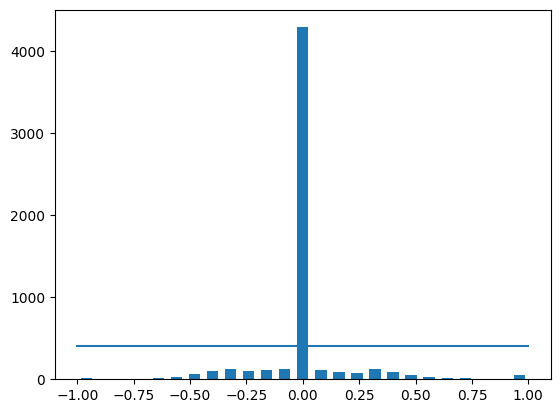

In [41]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))


In [42]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 3893
remaining: 1764


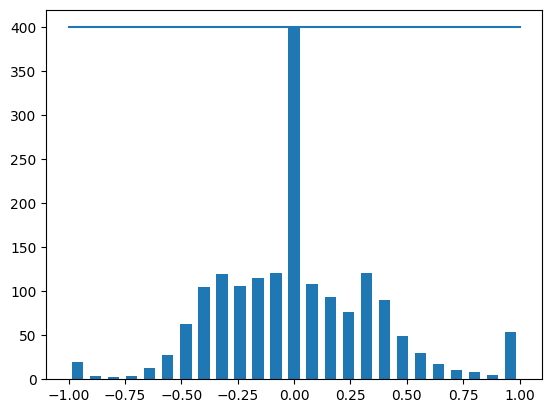

In [43]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))


map the image path and steering angle into vectors
for images [ center , left , right ]


In [44]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings



In [45]:
  image_paths, steerings = load_img_steering(datadir + '/IMG', data)

<ipython-input-44-749024752340>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
<ipython-input-44-749024752340>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))
<ipython-input-44-749024752340>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3])+0.15)
<ipython-input-44-749024752340>:14:

In [46]:
steerings

array([ 0.  ,  0.15, -0.15, ...,  0.  ,  0.15, -0.15])

In [47]:
image_paths

array(['/content/drive/MyDrive/Behaviour cloning/term1_path1/IMG/center_2024_09_27_17_04_30_595.jpg',
       '/content/drive/MyDrive/Behaviour cloning/term1_path1/IMG/left_2024_09_27_17_04_30_595.jpg',
       '/content/drive/MyDrive/Behaviour cloning/term1_path1/IMG/right_2024_09_27_17_04_30_595.jpg',
       ...,
       '/content/drive/MyDrive/Behaviour cloning/term1_path1/IMG/center_2024_09_27_17_17_25_056.jpg',
       '/content/drive/MyDrive/Behaviour cloning/term1_path1/IMG/left_2024_09_27_17_17_25_056.jpg',
       '/content/drive/MyDrive/Behaviour cloning/term1_path1/IMG/right_2024_09_27_17_17_25_056.jpg'],
      dtype='<U91')

In [48]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))


Training Samples: 4233
Valid Samples: 1059


Text(0.5, 1.0, 'Validation set')

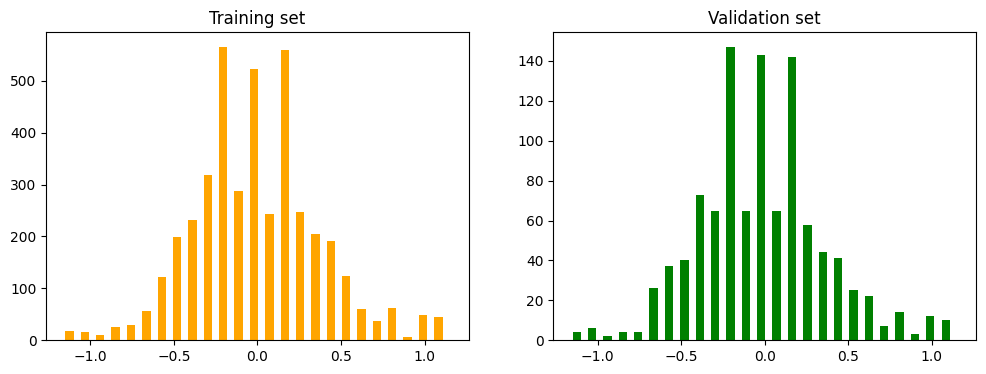

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='orange')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='green')
axes[1].set_title('Validation set')

Data augmentation: zoom , pan , brightness, randomflip

Text(0.5, 1.0, 'Zoomed Image')

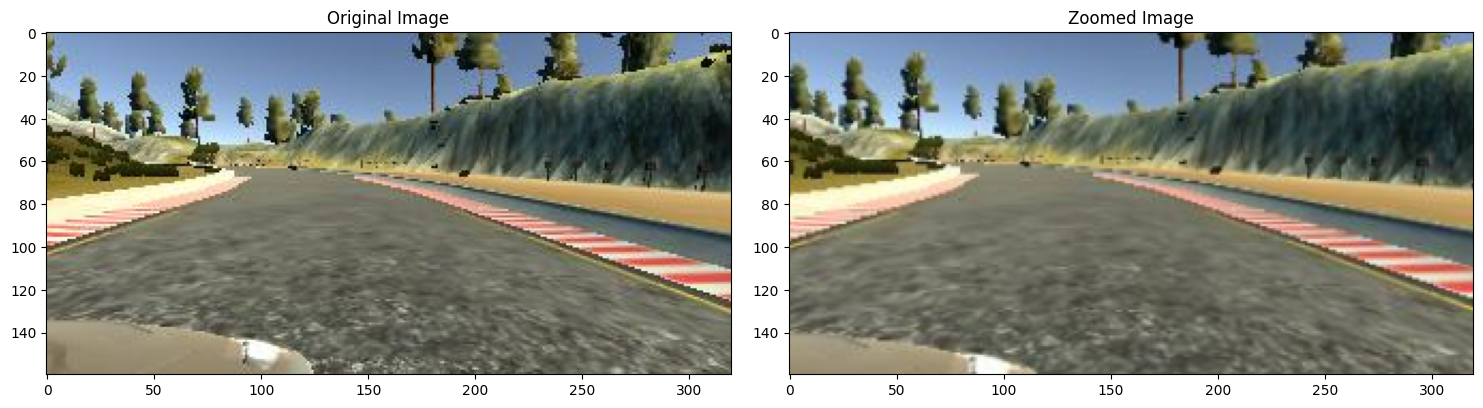

In [51]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image


image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
# /content/drive/MyDrive/Behaviour cloning/term1_path1/IMG
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

# /content/drive/MyDrive/Behaviour cloning/term1_path1/IMG/center_2024_09_27_17_04_29_869.jpg

In [52]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle


In [53]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle


#why <0.5 ????

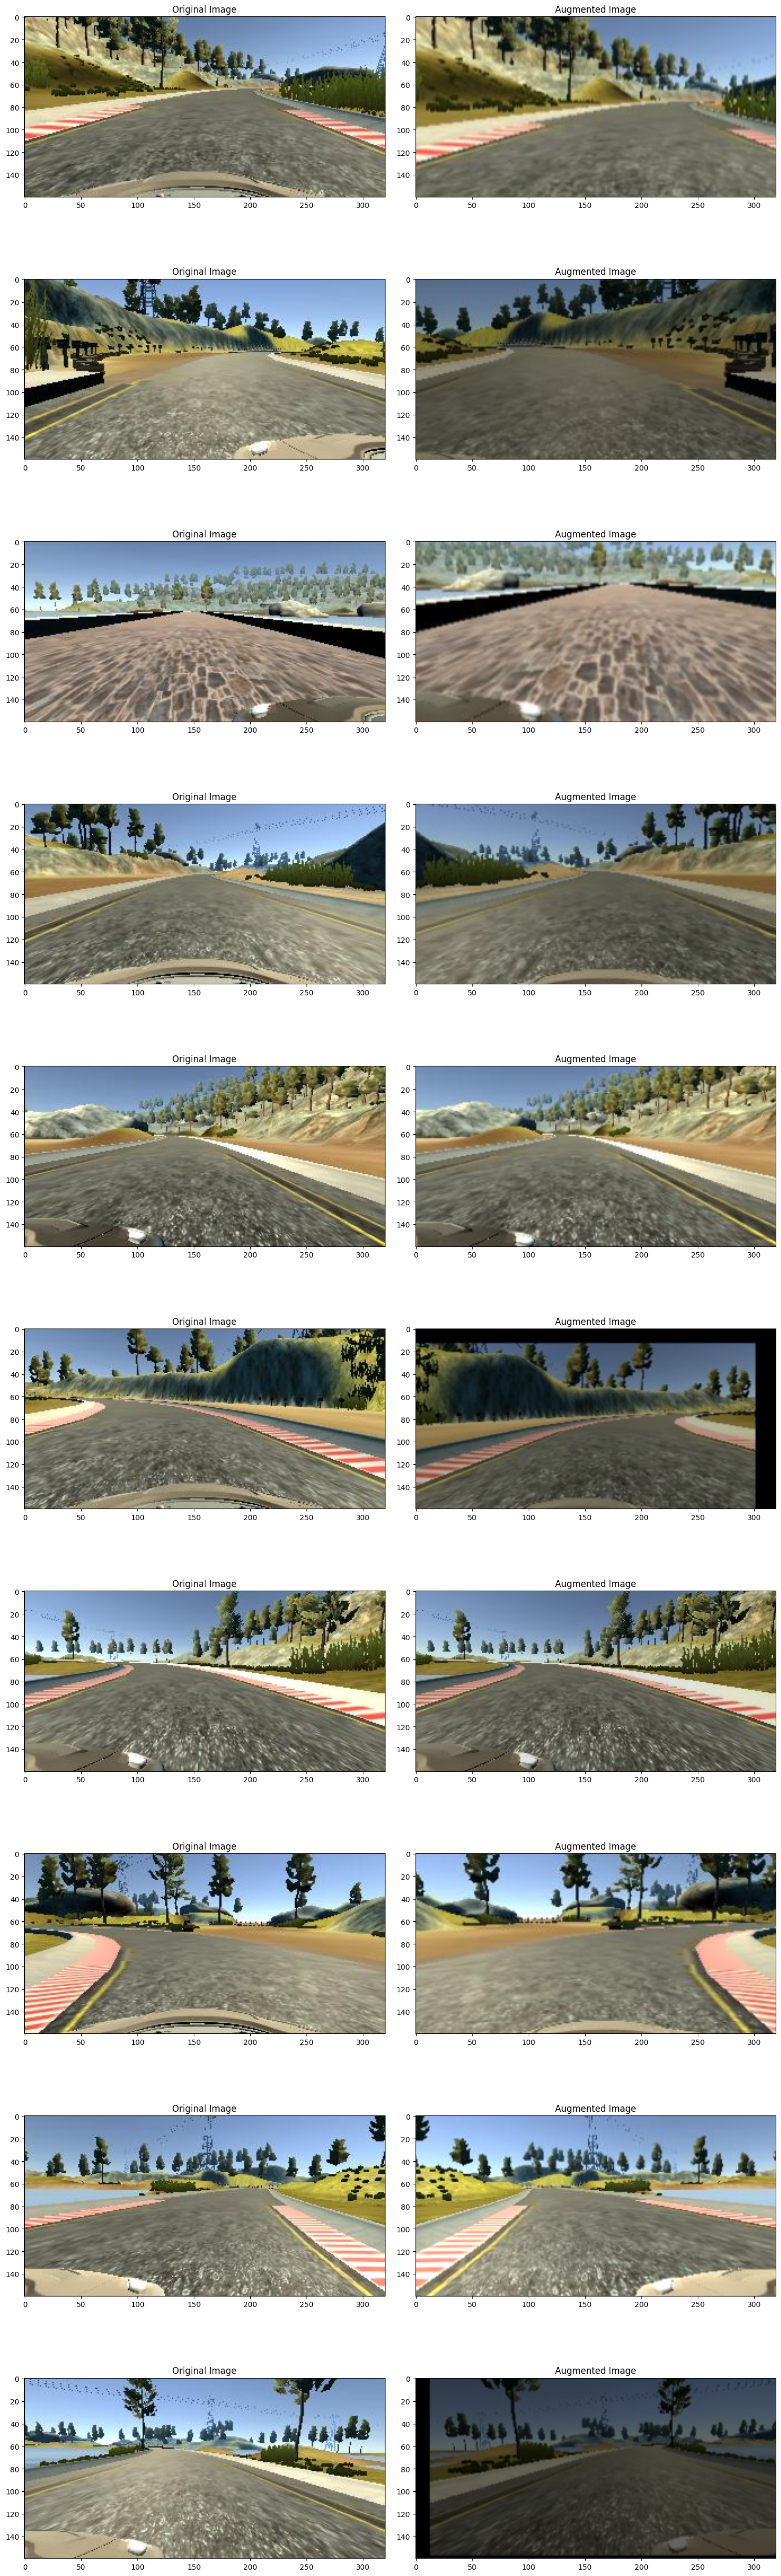

In [55]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

Image Preprocessing for NVIDIA model
RGB2YUV GaussianBlur Resizing to (200,66)

In [56]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

In [57]:
!nvidia-smi


Sun Sep 29 14:22:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Spliting into Batches

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Nvidia Model

Sequential - conv x 4 - flatten - dense x 4


In [58]:
#use elu activation (best suits)

def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(64, (5, 5), activation='elu'))
  # model.add(Conv2D(64, (3,3), activation='elu'))
#   model.add(Dropout(0.5))


  model.add(Flatten())

  model.add(Dense(100, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(50, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(1))

  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model

model = nvidia_model()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 31, 98, 24)          │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 47, 36)          │          21,636 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 22, 48)           │          43,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 18, 64)           │          76,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,443 (1.01 MB)

 Trainable params: 264,443 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300,
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)